<a href="https://colab.research.google.com/github/GeorgiaAAAl/GeorgiaAAAl/blob/main/C%C3%B3pia_de_Gr%C3%A1ficos_Georgia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/georgia/georgia.xlsx')
display(df)

,Data proc,G1 Protocol,Prontuário,Mass (kg),CATEGORIA,PKA DAP total (Gy.cm^2)
0,2018-10-15,THORAX,14291066,2.195,A,0.0307
1,2020-12-08,THORAX,16274896,2.215,A,0.0200
2,2019-05-07,THORAX,15788953,2.250,A,0.0323
3,2022-10-21,VASCLAR HQ,16902561,2.315,A,0.0422
4,2023-01-11,THORAX,16954091,2.330,A,0.0113
...,...,...,...,...,...,...
811,2017-11-17,THORAX,11958014,95.700,F,1.1700
812,2018-04-16,THORAX,14231666,96.000,F,0.5590
813,2021-03-22,THORAX,16278137,98.000,F,3.5300
814,2021-03-29,THORAX,16278137,98.000,F,0.2010


In [ ]:
categoria_cont = df['CATEGORIA'].value_counts()
categoria_cont = categoria_cont.reindex(['A', 'B', 'C', 'D', 'E', 'F'])
display(categoria_cont)

,count
CATEGORIA,
A,80
B,439
C,153
D,77
E,56
F,11


In [ ]:
categoriasestat = df.groupby('CATEGORIA')['PKA DAP total (Gy.cm^2)'].describe()
categorias_dados = categoriasestat[['min', '50%', '75%', 'max']]
display(categorias_dados)

,min,50%,75%,max
CATEGORIA,,,,
A,0.001300,0.04355,0.1765,2.13
B,0.000219,0.08040,0.2780,16.70
C,0.002330,0.14300,0.4080,9.34
D,0.004640,0.18900,0.9040,8.65
E,0.006850,0.30700,1.0130,19.90
F,0.201000,1.04000,3.9000,12.10


In [ ]:
faixa_kg = {
    'A': '< 5 kg',
    'B': '5 < 15 kg',
    'C': '15 < 30 kg',
    'D': '30 < 50 kg',
    'E': '50 < 80 kg',
    'F': '  80 kg < '
}

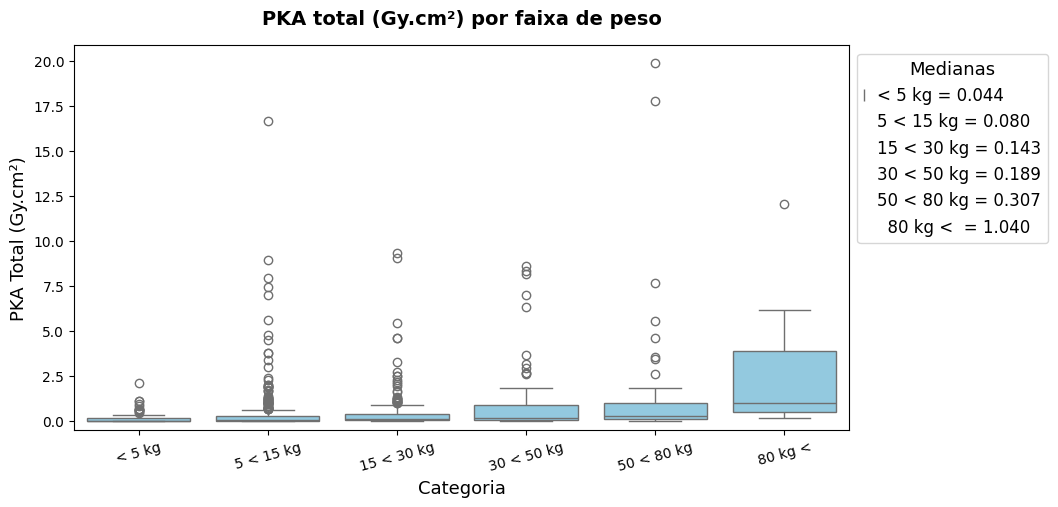

In [ ]:
#com outliers
plt.figure(figsize=(10, 5), facecolor='white')
sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gy.cm^2)', data=df, color='skyblue')
plt.title('PKA total (Gy.cm²) por faixa de peso', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria', fontsize=13)
plt.ylabel('PKA Total (Gy.cm²)', fontsize=13)
plt.ylim(bottom=-0.5)
plt.xticks(rotation=15)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['< 5 kg', '5 < 15 kg', '15 < 30 kg', '30 < 50 kg', '50 < 80 kg', '80 kg <']) # se você não especificou quais são as categorias no texto

medianas = categorias_dados['50%']
legenda_textos = [f'{faixa_kg[categoria]} = {mediana:.3f}' for categoria, mediana in medianas.items()] # se você não especificou quais são as categorias no texto
plt.legend(legenda_textos, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title="Medianas", title_fontsize=13, handlelength=0)

plt.show()

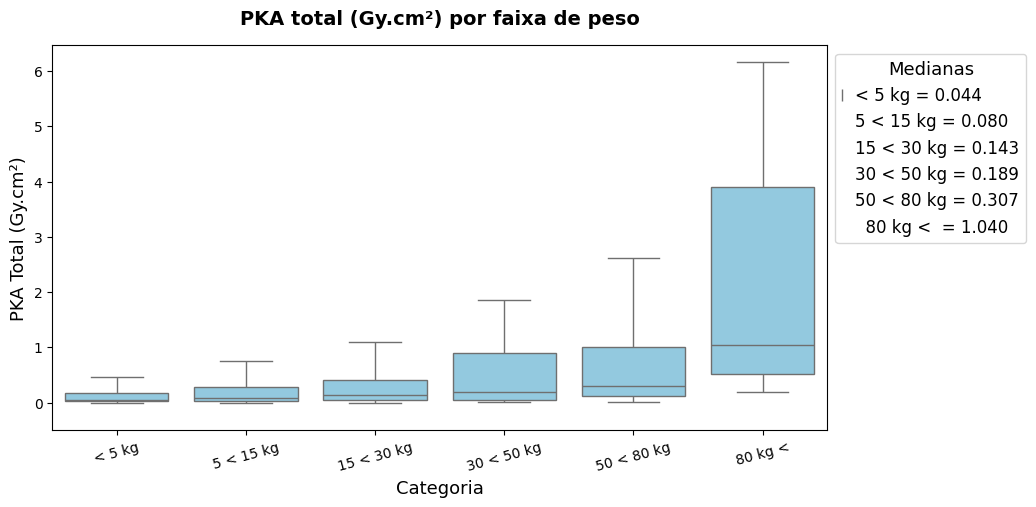

In [ ]:
#sem outliers
plt.figure(figsize=(10, 5), facecolor='white')
plt.title('PKA total (Gy.cm²) por faixa de peso', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria', fontsize=13)
plt.ylabel('PKA Total (Gy.cm²)', fontsize=13)
sns.boxplot(x='CATEGORIA', y='PKA DAP total (Gy.cm^2)', data=df, showfliers=False, whis=2, color='skyblue')
plt.ylim(bottom=-0.5)
plt.xticks(rotation=15)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['< 5 kg', '5 < 15 kg', '15 < 30 kg', '30 < 50 kg', '50 < 80 kg', '80 kg <'])

medianas = categorias_dados['50%']
legenda_textos = [f'{faixa_kg[categoria]} = {mediana:.3f}' for categoria, mediana in medianas.items()] # se você não especificou quais são as categorias no texto
plt.legend(legenda_textos, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title="Medianas", title_fontsize=13, handlelength=0)

plt.show()